<a href="https://colab.research.google.com/github/Unaixafaheem/Artificial-Intelligence/blob/main/Email_Spam_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 **

✅ Dataset loaded successfully!
Total samples: 5169


/tmp/ipython-input-3114357176.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


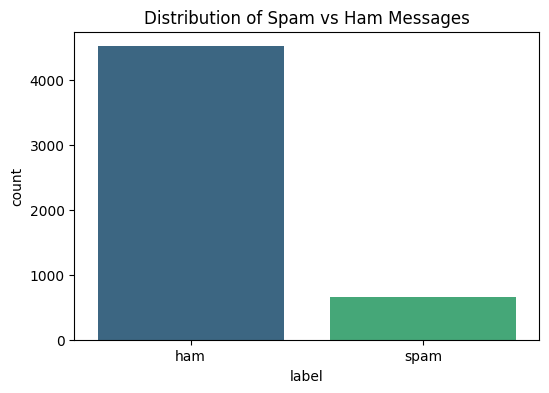

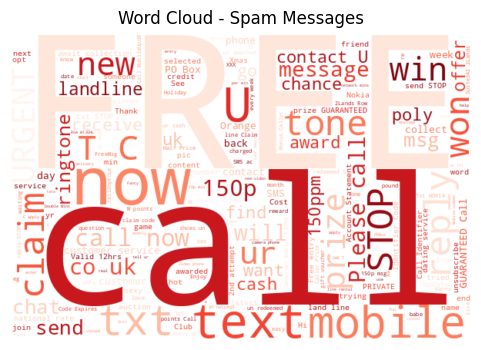


🔹 Naive Bayes Accuracy: 96.71%

🔹 Logistic Regression Accuracy: 95.65%

🔹 SVM Accuracy: 97.78%


/tmp/ipython-input-3114357176.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')


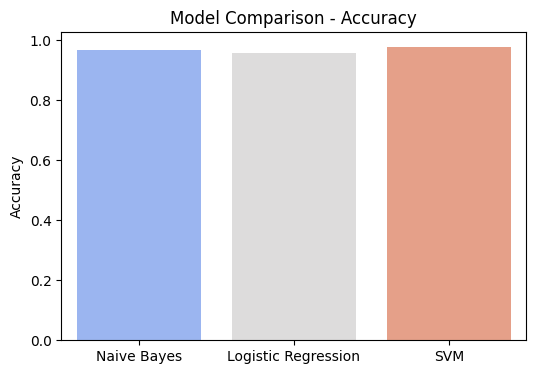


🏆 Best Model: SVM with Accuracy: 97.78%

📊 Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99       903
        Spam       0.97      0.85      0.91       131

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



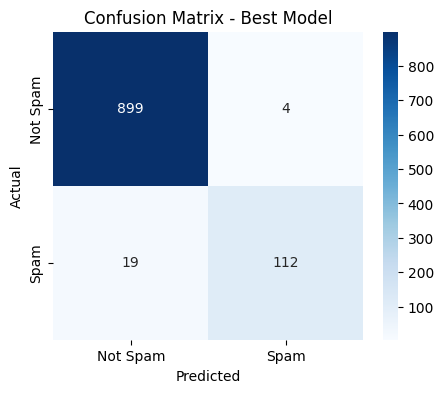


💾 Model and vectorizer saved successfully!

🌐 Launching Gradio app...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e78faa53321a896cbd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ==========================================
# 📧 EMAIL SPAM CLASSIFIER - PRO EDITION
# ==========================================
# Author: Unaiza Faheem
# Internship Task 1 - AI using Python
# Goal: Classify emails as SPAM or NOT SPAM
# ==========================================

# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import gradio as gr

# --- Step 2: Load dataset ---
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
data.drop_duplicates(inplace=True)
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})
print("✅ Dataset loaded successfully!")
print(f"Total samples: {len(data)}")

# --- Step 3: Visualize data ---
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

# Word Cloud for Spam
spam_words = ' '.join(data[data['label']=='spam']['message'])
spam_wc = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(spam_words)
plt.figure(figsize=(6,4))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Spam Messages")
plt.show()

# --- Step 4: Split dataset ---
X = data['message']
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 5: Feature extraction (TF-IDF) ---
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# --- Step 6: Train multiple models ---
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc*100:.2f}%")

# --- Step 7: Compare models visually ---
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

# --- Step 8: Choose best model ---
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]*100:.2f}%")

# --- Step 9: Detailed Evaluation ---
y_pred = best_model.predict(X_test_tfidf)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Step 10: Save the model ---
joblib.dump(best_model, "spam_classifier_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("\n💾 Model and vectorizer saved successfully!")

# --- Step 11: Create Gradio web app ---
def predict_spam(email):
    model = joblib.load("spam_classifier_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    input_features = vectorizer.transform([email])
    prediction = model.predict(input_features)[0]
    return "🚨 SPAM" if prediction == 1 else "✅ NOT SPAM"

demo = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(lines=3, placeholder="Enter email text here..."),
    outputs="text",
    title="📧 Email Spam Classifier",
    description="Enter an email message below to check if it's spam or not."
)

print("\n🌐 Launching Gradio app...")
demo.launch(share=True)
